In [14]:
from collections import Counter
from functools import partial
from linear_algebra import dot, vector_add
from stats import median, standard_deviation
from probability import normal_cdf
from gradient_descent import minimize_stochastic
from simple_linear_regression import total_sum_of_squares
from working_with_data import rescale
import math, random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def predict(x_i, beta):
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

def squared_error_gradient(x_i, y_i, beta):
    """the gradient corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]

def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
                               squared_error_gradient,
                               x, y,
                               beta_initial,
                               0.001)

def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
                                for x_i, y_i in zip(x, y))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(y)

In [2]:
df=pd.read_csv('H:\datasets\casa\casa.csv', sep=',',header=0)
datax = [[x[5], x[12]]for x in df.values]
datax = np.log(datax)
datax = np.insert(datax,0, values= int(1), axis=1)
datay = [x[2]for x in df.values]

random.seed(0)
beta = estimate_beta(datax,datay)

In [3]:
print("R2 = ", multiple_r_squared(datax,datay,beta))


R2 =  0.3748941548531455


In [6]:
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]

In [9]:
data = list(map(list, data))
x = [[1] + row[:2] for row in data]
y = [row[2] for row in data]

In [8]:
x

[[1, 0.7, 48000],
 [1, 1.9, 48000],
 [1, 2.5, 60000],
 [1, 4.2, 63000],
 [1, 6, 76000],
 [1, 6.5, 69000],
 [1, 7.5, 76000],
 [1, 8.1, 88000],
 [1, 8.7, 83000],
 [1, 10, 83000],
 [1, 0.8, 43000],
 [1, 1.8, 60000],
 [1, 10, 79000],
 [1, 6.1, 76000],
 [1, 1.4, 50000],
 [1, 9.1, 92000],
 [1, 5.8, 75000],
 [1, 5.2, 69000],
 [1, 1, 56000],
 [1, 6, 67000],
 [1, 4.9, 74000],
 [1, 6.4, 63000],
 [1, 6.2, 82000],
 [1, 3.3, 58000],
 [1, 9.3, 90000],
 [1, 5.5, 57000],
 [1, 9.1, 102000],
 [1, 2.4, 54000],
 [1, 8.2, 65000],
 [1, 5.3, 82000],
 [1, 9.8, 107000],
 [1, 1.8, 64000],
 [1, 0.6, 46000],
 [1, 0.8, 48000],
 [1, 8.6, 84000],
 [1, 0.6, 45000],
 [1, 0.5, 30000],
 [1, 7.3, 89000],
 [1, 2.5, 48000],
 [1, 5.6, 76000],
 [1, 7.4, 77000],
 [1, 2.7, 56000],
 [1, 0.7, 48000],
 [1, 1.2, 42000],
 [1, 0.2, 32000],
 [1, 4.7, 56000],
 [1, 2.8, 44000],
 [1, 7.6, 78000],
 [1, 1.1, 63000],
 [1, 8, 79000],
 [1, 2.7, 56000],
 [1, 6, 52000],
 [1, 4.6, 56000],
 [1, 2.5, 51000],
 [1, 5.7, 71000],
 [1, 2.9, 65000],
 [

In [10]:
y

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1]

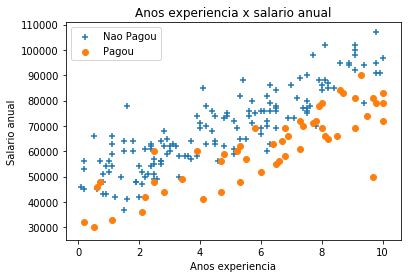

In [13]:
plt.scatter([xi[1] for xi, yi in zip(x,y) if yi == 0], [xi[2] for xi,yi in zip(x,y) if yi == 0], marker="+", label="Nao Pagou")
plt.scatter([xi[1] for xi, yi in zip(x,y) if yi == 1], [xi[2] for xi,yi in zip(x,y) if yi == 1], marker="o", label="Pagou")
plt.legend(loc='upper left')
plt.title("Anos experiencia x salario anual")
plt.xlabel("Anos experiencia")
plt.ylabel("Salario anual")
plt.show()

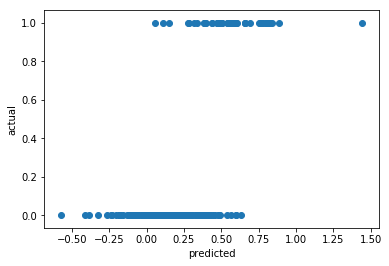

In [15]:
rescaled_x = rescale(x)
beta = estimate_beta(rescaled_x, y)
predictions = [predict(xi, beta) for xi in rescaled_x]
plt.scatter(predictions, y)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()